# Rugby Data Exploration

This notebook explores the structure of the rugby match data and validates the data pipeline.

In [7]:
from rugby_ranking.notebook_utils import setup_notebook_environment, print_summary
import matplotlib.pyplot as plt

# One-line setup: loads data, configures plots, handles paths
dataset, df, model_dir = setup_notebook_environment()

Loading from: /home/daniel/repositories/personal/Rugby-Data
Loaded 10029 matches from /home/daniel/repositories/personal/Rugby-Data/json
Found 10448 unique players
Found 112 unique teams
✓ Loaded 374,523 player-match observations
  Players: 10,435
  Teams: 107
  Matches: 16,839
  Date range: 2006-09-02 to 2026-01-31


## Load Data

Point this to your Rugby-Data repository.

In [2]:
# Data is already loaded above. Verify dataset info:
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['date'].min().date()} to {df['date'].max().date()}")

Dataset shape: (374523, 25)
Date range: 2006-09-02 to 2026-01-31


In [3]:
# Display first few rows
print(f"Shape: {df.shape}")
df.head()

Shape: (374523, 25)


,player_name,player_id,team,team_id,opponent,opponent_id,match_id,season,competition,date,...,tries,conversions,penalties,drop_goals,total_points,yellow_cards,red_cards,team_score,opponent_score,match_result
0,David Fitter,9384,London Irish,65,Harlequins,50,premiership_2006-2007_131,2006-2007,premiership,2006-09-02 00:00:00+00:00,...,0,0,0,0,0,0,0,20,19,win
1,James Hayter,412,Harlequins,50,London Irish,65,premiership_2006-2007_131,2006-2007,premiership,2006-09-02 00:00:00+00:00,...,0,0,0,0,0,0,0,19,20,loss
2,Will Skinner,3698,Harlequins,50,London Irish,65,premiership_2006-2007_131,2006-2007,premiership,2006-09-02 00:00:00+00:00,...,0,0,0,0,0,0,0,19,20,loss
3,Nick Easter,3789,Harlequins,50,London Irish,65,premiership_2006-2007_131,2006-2007,premiership,2006-09-02 00:00:00+00:00,...,0,0,0,0,0,0,0,19,20,loss
4,Michael Horak,4929,London Irish,65,Harlequins,50,premiership_2006-2007_131,2006-2007,premiership,2006-09-02 00:00:00+00:00,...,0,0,0,0,0,0,0,20,19,win


## Data Overview

In [4]:
print("Competitions:")
print(df['competition'].value_counts())
print("\nSeasons:")
print(df['season'].value_counts().sort_index())

Competitions:
competition
premiership       109154
celtic             82046
euro-champions     56564
euro-challenge     50474
top14              38753
pro-d2             33440
championship        4092
Name: count, dtype: int64

Seasons:
season
2006-2007     6372
2007-2008     8778
2008-2009    13490
2009-2010    16115
2010-2011    17735
2011-2012    17902
2012-2013    20498
2013-2014    16268
2014-2015    16323
2015-2016    18241
2016-2017    18669
2017-2018    19379
2018-2019    19176
2019-2020    18555
2020-2021    21355
2021-2022    20285
2022-2023    28334
2023-2024    26910
2024-2025    27048
2025-2026    23090
Name: count, dtype: int64


In [5]:
print(f"Unique players: {df['player_name'].nunique()}")
print(f"Unique teams: {df['team'].nunique()}")
print(f"Unique matches: {df.groupby(['date', 'team']).ngroups:,}")

Unique players: 10435
Unique teams: 107
Unique matches: 16,839


## Scoring Distributions

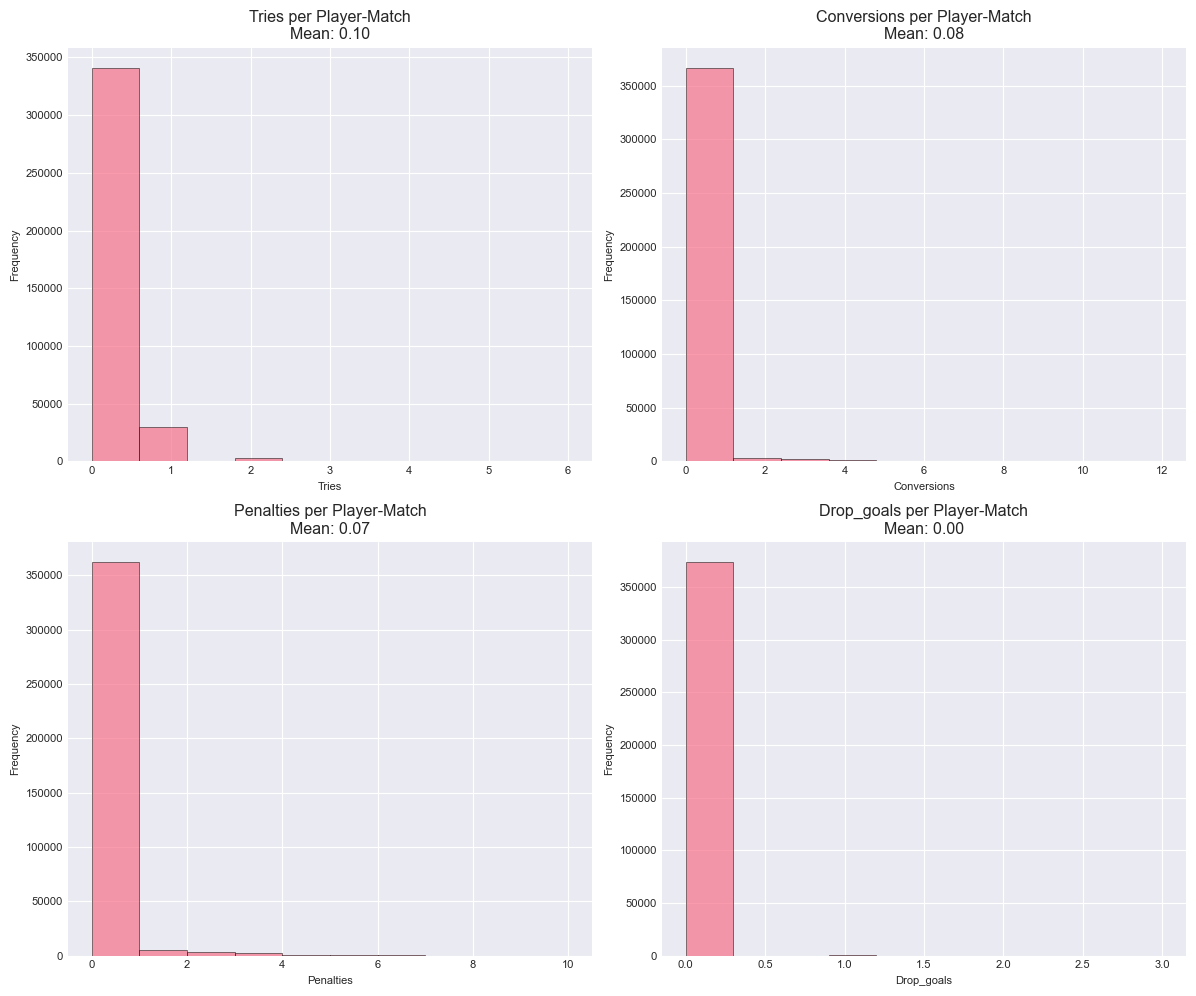

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, score_type in zip(axes.flat, ['tries', 'conversions', 'penalties', 'drop_goals']):
    data = df[score_type]
    ax.hist(data,  edgecolor='black', alpha=0.7)
    ax.set_xlabel(score_type.capitalize())
    ax.set_ylabel('Frequency')
    ax.set_title(f'{score_type.capitalize()} per Player-Match\nMean: {data.mean():.2f}')

plt.tight_layout()
plt.show()

## Position Analysis

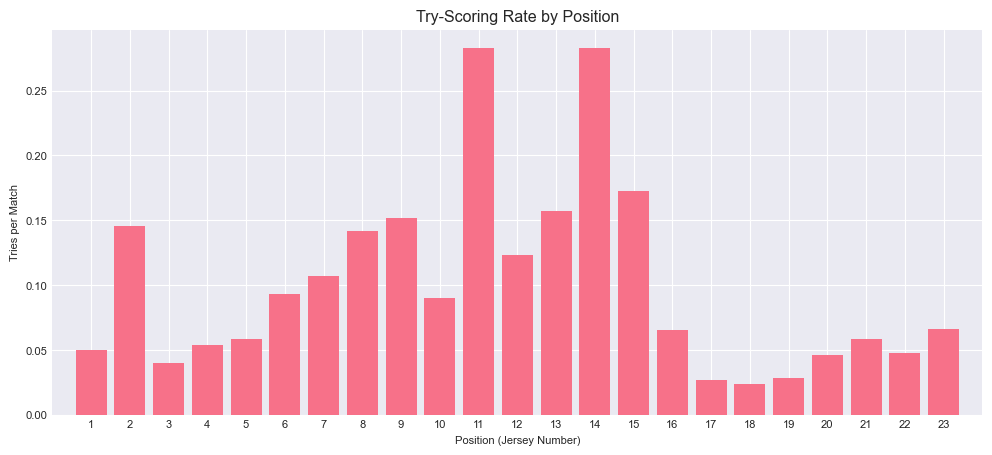

In [9]:
# Tries by position
position_tries = df.groupby('position')['tries'].agg(['sum', 'mean', 'count'])
position_tries.columns = ['total_tries', 'tries_per_match', 'appearances']

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(position_tries.index, position_tries['tries_per_match'])
ax.set_xlabel('Position (Jersey Number)')
ax.set_ylabel('Tries per Match')
ax.set_title('Try-Scoring Rate by Position')
ax.set_xticks(range(1, 24))
ax.set_xlim([0,24])
plt.show()

# Position labels for reference
positions = {
    1: 'Loosehead Prop', 2: 'Hooker', 3: 'Tighthead Prop',
    4: 'Lock', 5: 'Lock', 6: 'Blindside Flanker',
    7: 'Openside Flanker', 8: 'Number 8',
    9: 'Scrum-half', 10: 'Fly-half', 11: 'Left Wing',
    12: 'Inside Centre', 13: 'Outside Centre', 14: 'Right Wing', 15: 'Fullback',
    16: 'Sub', 17: 'Sub', 18: 'Sub', 19: 'Sub', 20: 'Sub', 21: 'Sub', 22: 'Sub', 23: 'Sub'
}

## Player Mobility

How often do players change teams?

In [10]:
player_teams = dataset.get_player_teams()

# Count teams per player
teams_per_player = player_teams.groupby('player_name')['team'].nunique()
print("Teams per player distribution:")
print(teams_per_player.value_counts().sort_index())

# Players who played for multiple teams
mobile_players = teams_per_player[teams_per_player > 1]
print(f"\n{len(mobile_players)} players played for multiple teams ({100*len(mobile_players)/len(teams_per_player):.1f}%)")

Teams per player distribution:
team
1     6654
2     2423
3      920
4      325
5       86
6       21
7        4
8        2
19       1
Name: count, dtype: int64

3782 players played for multiple teams (36.2%)


In [11]:
teams_per_player[teams_per_player > 10]

player_name
Simon Darcy    19
Name: team, dtype: int64

In [12]:
# Example: players who changed teams
if len(mobile_players) > 0:
    example_player = teams_per_player[teams_per_player > 10].index[0] # mobile_players.index[5]
    print(f"\nCareer of {example_player}:")
    display(player_teams[player_teams['player_name'] == example_player])


Career of Simon Darcy:


,player_name,team,season,matches,minutes_played,tries,total_points
34372,Simon Darcy,Bath Rugby,2006-2007,1,80.0,0,0
34373,Simon Darcy,Bayonne,2006-2007,1,0.0,0,0
34374,Simon Darcy,Benetton Rugby,2006-2007,1,80.0,0,0
34375,Simon Darcy,Borders,2006-2007,1,80.0,0,0
34376,Simon Darcy,Bourgoin,2006-2007,2,160.0,0,0
34377,Simon Darcy,Bristol Bears,2006-2007,2,80.0,0,0
34378,Simon Darcy,Clermont,2006-2007,1,80.0,0,0
34379,Simon Darcy,Connacht Rugby,2006-2007,1,0.0,0,0
34380,Simon Darcy,Crociati,2006-2007,1,0.0,0,0
34381,Simon Darcy,Dragons RFC,2006-2007,1,0.0,0,0


## Minutes Played Distribution

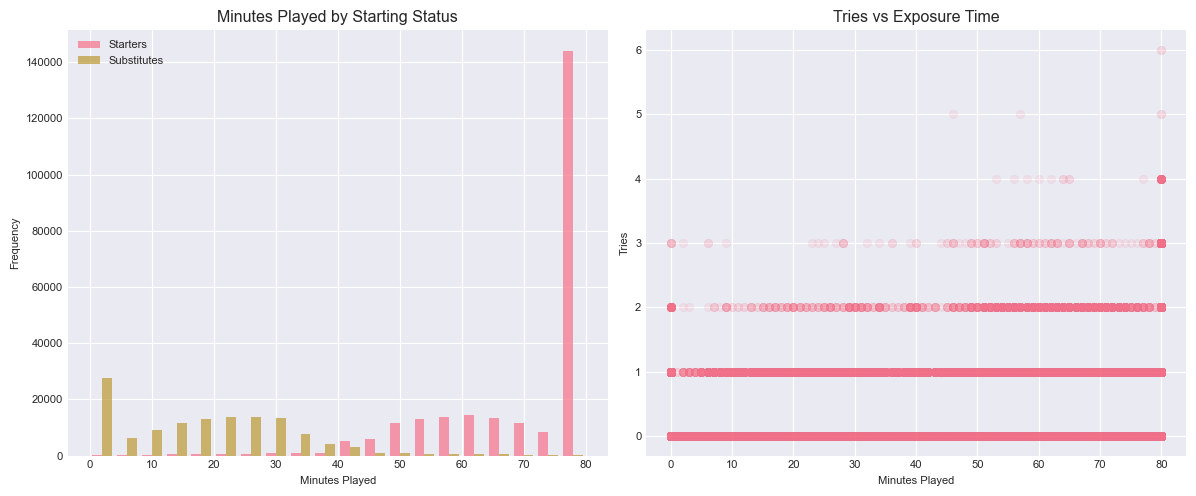

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Starters vs subs
axes[0].hist([df[df['started']]['minutes_played'], df[~df['started']]['minutes_played']], 
             bins=20, label=['Starters', 'Substitutes'], alpha=0.7)
axes[0].set_xlabel('Minutes Played')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Minutes Played by Starting Status')
axes[0].legend()

# Exposure vs tries
axes[1].scatter(df['minutes_played'], df['tries'], alpha=0.1)
axes[1].set_xlabel('Minutes Played')
axes[1].set_ylabel('Tries')
axes[1].set_title('Tries vs Exposure Time')

plt.tight_layout()
plt.show()

## Disciplinary Analysis

Yellow cards: 6793
Red cards: 352

Matches with cards: 4209 (yellow)
                     322 (red)


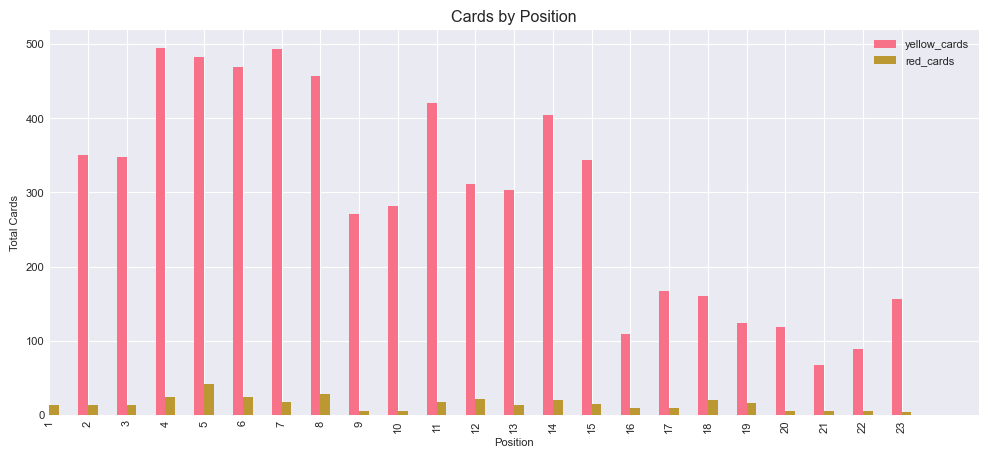

In [14]:
print(f"Yellow cards: {df['yellow_cards'].sum()}")
print(f"Red cards: {df['red_cards'].sum()}")
print(f"\nMatches with cards: {df[df['yellow_cards'] > 0]['match_id'].nunique()} (yellow)")
print(f"                     {df[df['red_cards'] > 0]['match_id'].nunique()} (red)")

# Cards by position
cards_by_pos = df.groupby('position')[['yellow_cards', 'red_cards']].sum()
cards_by_pos.plot(kind='bar', figsize=(12, 5))
plt.title('Cards by Position')
plt.xlabel('Position')
plt.ylabel('Total Cards')
plt.xlim([0,24])
plt.show()

## Unplayed Matches (for prediction)

In [ ]:
unplayed = dataset.get_unplayed_matches()
print(f"Unplayed matches: {len(unplayed)}")

if unplayed:
    print("\nUpcoming fixtures:")
    for match in unplayed[:10]:
        print(f"  {match.home_team} vs {match.away_team} ({match.competition})")

Unplayed matches: 183

Upcoming fixtures:
  Glasgow Warriors vs Munster Rugby (celtic)
  Benetton Rugby vs Scarlets (celtic)
  Emirates Lions vs Vodacom Bulls (celtic)
  Zebre Parma vs Connacht Rugby (celtic)
  Hollywoodbets Sharks vs DHL Stormers (celtic)
  Leinster Rugby vs Edinburgh Rugby (celtic)
  Ulster Rugby vs Cardiff Rugby (celtic)
  Ospreys vs Dragons RFC (celtic)
  Emirates Lions vs Hollywoodbets Sharks (celtic)
  Cardiff Rugby vs Leinster Rugby (celtic)


## Summary Statistics for Modelling

In [16]:
print("Key statistics for model specification:")
print(f"  - Total observations: {len(df):,}")
print(f"  - Players: {df['player_name'].nunique():,}")
print(f"  - Teams: {df['team'].nunique()}")
print(f"  - Seasons: {df['season'].nunique()}")
print(f"  - Team-seasons: {df.groupby(['team', 'season']).ngroups}")
print(f"  - Mean tries per player-match: {df['tries'].mean():.3f}")
print(f"  - Mean penalties per player-match: {df['penalties'].mean():.3f}")
print(f"  - Mean minutes played: {df['minutes_played'].mean():.1f}")
print(f"  - Home win rate: {(df.groupby('match_id').first()['match_result'] == 'win').mean():.1%}")

Key statistics for model specification:
  - Total observations: 374,523
  - Players: 10,435
  - Teams: 107
  - Seasons: 20
  - Team-seasons: 925
  - Mean tries per player-match: 0.101
  - Mean penalties per player-match: 0.067
  - Mean minutes played: 52.7
  - Home win rate: 48.2%
